In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
file_path = r"D:\ProdigyInfotech\PRODIGY_DS_04\PRODIGY_DS_04_Data.csv"
data = pd.read_csv(file_path)

In [3]:
data.columns = ['ID', 'Platform', 'Sentiment', 'Post']

In [4]:
# Define a function to get the sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

In [5]:
# Apply the sentiment analysis function to the posts
data['Sentiment_Polarity'] = data['Post'].apply(get_sentiment_polarity)

In [6]:
# Calculate the average sentiment polarity for each platform
platform_sentiment = data.groupby('Platform')['Sentiment_Polarity'].mean().sort_values()

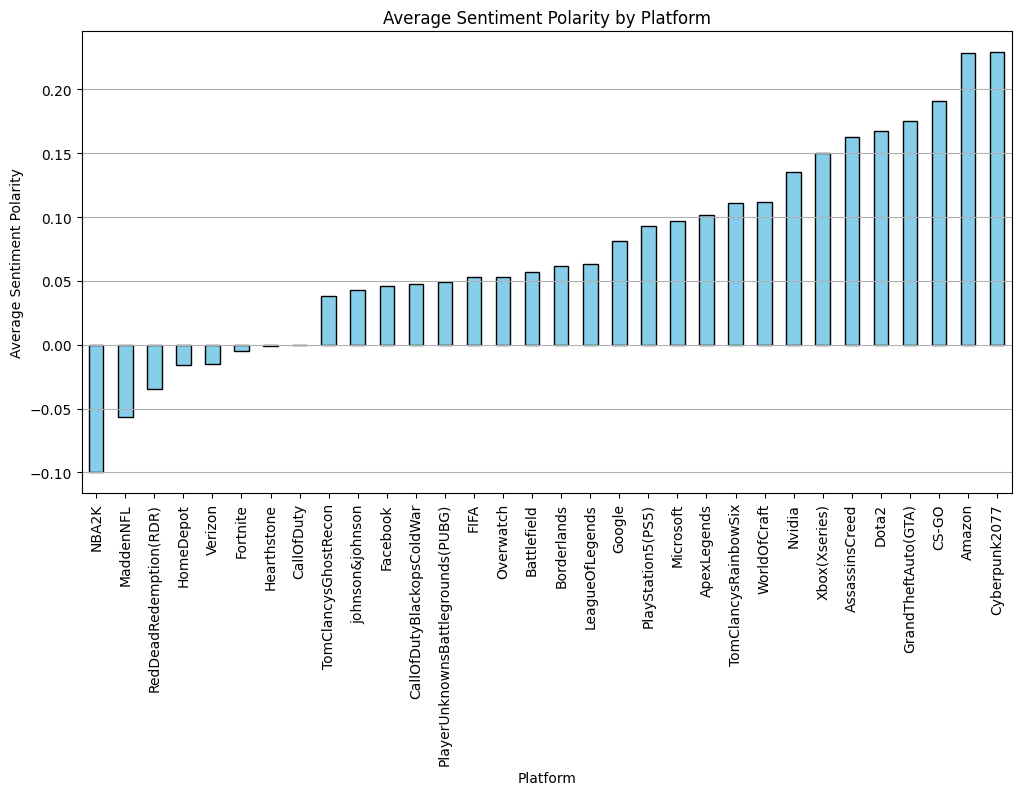

In [7]:
# Visualize the average sentiment polarity by platform
plt.figure(figsize=(12, 6))
platform_sentiment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Sentiment Polarity by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Sentiment Polarity')
plt.grid(axis='y')
plt.show()

In [8]:
# Select the top 10 topics/brands by the number of mentions
top_topics = data['Platform'].value_counts().head(10).index
top_topic_sentiment = data[data['Platform'].isin(top_topics)].groupby('Platform')['Sentiment_Polarity'].mean().sort_values()

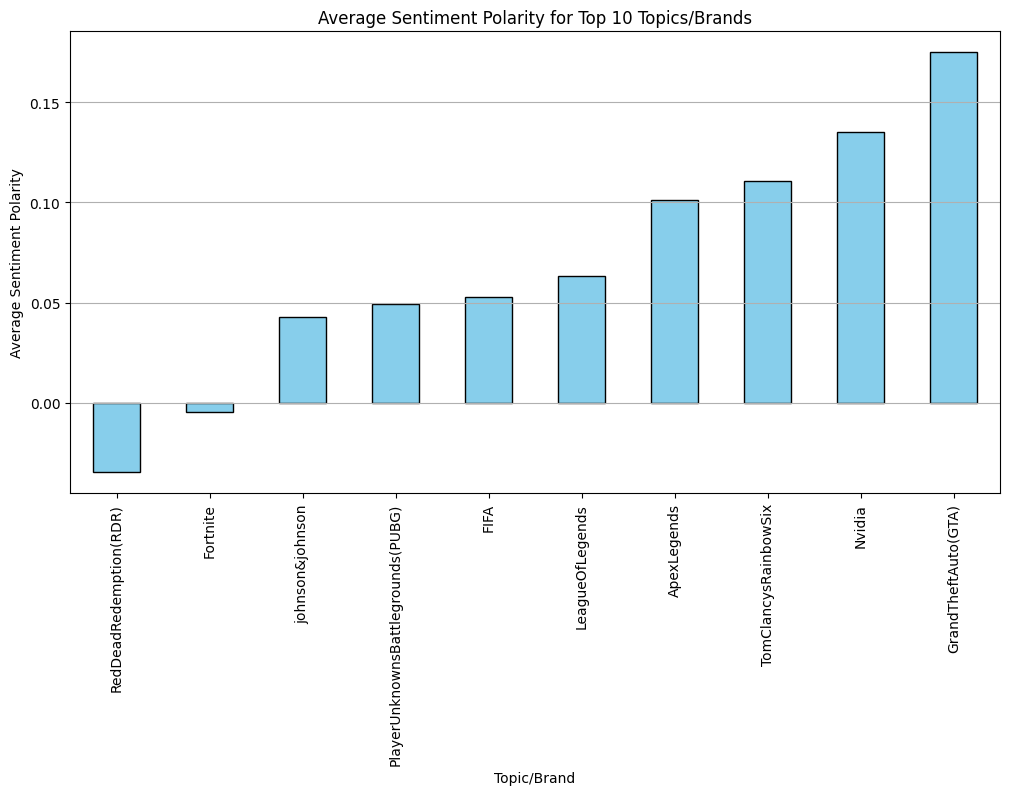

In [9]:
# Visualize the average sentiment polarity for the top topics/brands
plt.figure(figsize=(12, 6))
top_topic_sentiment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Sentiment Polarity for Top 10 Topics/Brands')
plt.xlabel('Topic/Brand')
plt.ylabel('Average Sentiment Polarity')
plt.grid(axis='y')
plt.show()